<h1><font color = 'darkblue',size =12><center>BANK MARKETING CAMPAIGN</font></h1>

_Runa Veigas_<br>
<right>runaveigas@gmail.com</right><br>

<h2><font color = 'green'>Objective</font></h2>

The classification goal is to predict if the client will subscribe a term deposit (variable y).


<h2><font color = 'green'><CENTER>INPUT VARIABLES</font></h2>

### bank client data:
1 - age (numeric) <br>
2 - job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')<br>
3 - marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
<br>4 - education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
<br>5 - default: has credit in default? (categorical: 'no','yes','unknown')
<br>6 - housing: has housing loan? (categorical: 'no','yes','unknown')
<br>7 - loan: has personal loan? (categorical: 'no','yes','unknown')
### related with the last contact of the current campaign:
<br>8 - contact: contact communication type (categorical: 'cellular','telephone')
<br>9 - month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
<br>10 - day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
<br>11 - duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
### other attributes:
<br>12 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
<br>13 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
<br>14 - previous: number of contacts performed before this campaign and for this client (numeric)
<br>15 - poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
### social and economic context attributes
<br>16 - emp.var.rate: employment variation rate - quarterly indicator (numeric)
<br>17 - cons.price.idx: consumer price index - monthly indicator (numeric)
<br>18 - cons.conf.idx: consumer confidence index - monthly indicator (numeric)
<br>19 - euribor3m: euribor 3 month rate - daily indicator (numeric)
<br>20 - nr.employed: number of employees - quarterly indicator (numeric)

### Output variable (desired target):
21 - y - has the client subscribed a term deposit? (binary: 'yes','no')



In [1]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression

In [195]:
df = pd.read_csv('bank-full.csv',sep = ';')


<IPython.core.display.Javascript object>

In [196]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [197]:
df.shape

(45211, 17)

### Missing Values

In [6]:
def nullValues(df):
    numMissing = df.isnull().sum()
    percentMissing = (100 * numMissing)/len(df)
    concatValues = pd.concat([numMissing,percentMissing],axis = 1)
    
    #Renaming and Sorting the percentage of missing values in non ascending order
    missingRenamed = concatValues.rename(columns = {0:"Missing Values", 1: "Percentage of Missing"})
    missingRenamedSorted = missingRenamed[missingRenamed.iloc[:,1]!=0].sort_values(by = 'Percentage of Missing',ascending = False).round(1) 
    print("Bank Data has totally {} coloumns out of which {} coloumns have missing values.".format
          (df.shape[1],missingRenamedSorted.shape[0]))
    return missingRenamedSorted

In [8]:
missingValues = nullValues(df)

<IPython.core.display.Javascript object>

Bank Data has totally 17 coloumns out of which 0 coloumns have missing values.


#### Visual Representation:

<IPython.core.display.Javascript object>

<AxesSubplot:>

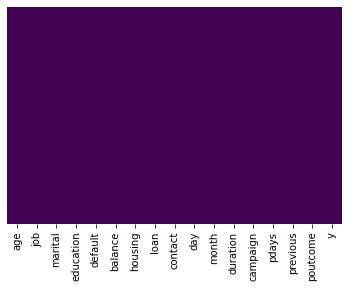

In [33]:
sns.heatmap(df.isnull(),yticklabels = False,cbar = False,cmap = 'viridis')

## Outliers

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\RUNA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\RUNA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'CAMPAIGN'}, xlabel='campaign'>

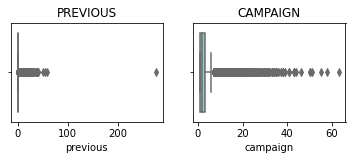

In [198]:



plt.subplot(2,2,3)
plt.title('PREVIOUS')
sns.boxplot(df['previous'],palette = 'Set3')

plt.subplot(2,2,4)
plt.title('CAMPAIGN')
sns.boxplot(df['campaign'],palette = 'Set3')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\RUNA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'PREVIOUS'}, xlabel='previous'>

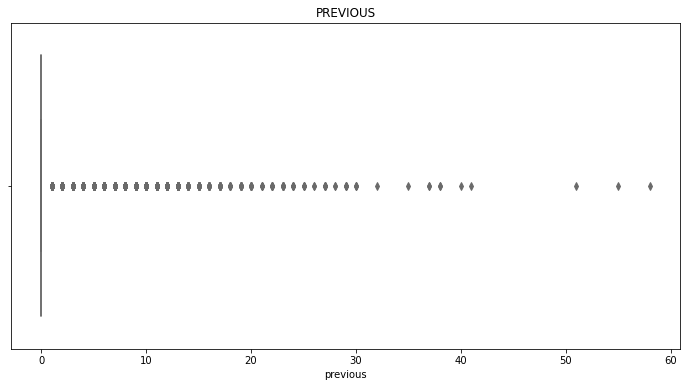

In [199]:
df = (df[df['previous']<100])
plt.figure(figsize = (12,6))
plt.title('PREVIOUS')
sns.boxplot(df['previous'],palette = 'Set3')

One data point was a extreme valaue as it was > 200. Thus I have dropped it.

### Outliers for Age

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\RUNA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'AGE'}, xlabel='age'>

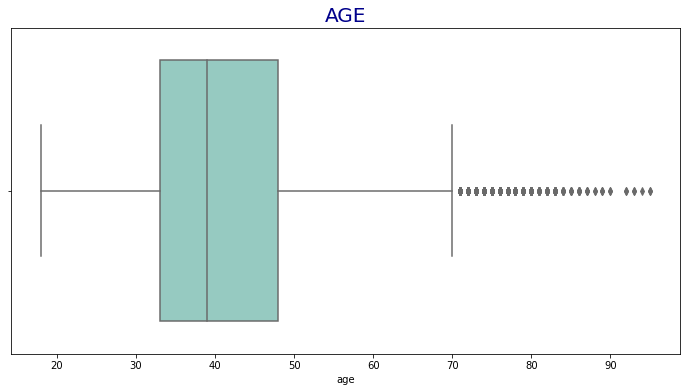

In [200]:

plt.figure(figsize = (12,6))
plt.title('AGE',fontsize =20,color = 'darkblue')
sns.boxplot(df['age'],palette = 'Set3')

In [201]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
sample_outliers = detect_outliers_iqr(df['age'])
print("Unique outliers from IQR method: ", set(sample_outliers))

print("Number of outliers from IQR method: ", len(sample_outliers))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Unique outliers from IQR method:  {71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 92, 93, 94, 95}
Number of outliers from IQR method:  487


In [202]:
df.query('age > 70 & y=="yes"').count().head(1)

age    218
dtype: int64

__Conclusion__: However there are few clients(218) who are above the age of 70 and who have opted for the policy. But they cannot be considered as outliers as they can add add value to the camapaign. Thus these values will not be changed

## Outliers for Duration

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\RUNA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'DURATION'}, xlabel='duration'>

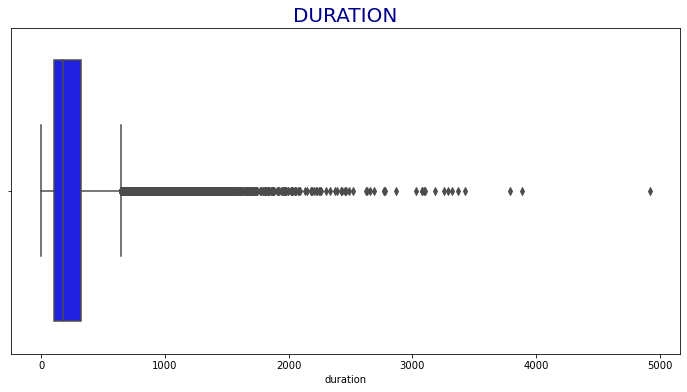

In [203]:
plt.figure(figsize = (12,6))
plt.title('DURATION',fontsize = 20,color = 'darkblue')
sns.boxplot(df['duration'],color = 'blue')

In [204]:
df.drop(df[df['duration'] > 1000].index,inplace = True)

The duration greater than 1000 have been dropped since the outliers will anyways be imputed with the median.

In [205]:
outliers = []
def detect_outliers_iqr(data):
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    # print(q1, q3)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    # print(lwr_bound, upr_bound)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers# Driver code
duration_outliers = detect_outliers_iqr(df['duration'])
#print("Unique outliers from IQR method: ", set(sample_outliers))

print("Outliers start from IQR method: ", min(duration_outliers))
print("Length of the outliers using IQR method: ", len(duration_outliers))

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Outliers start from IQR method:  609
Length of the outliers using IQR method:  2614


_Idea_: Here the average duration taken for a client when the policy is subscribed as yes and as no will be used for imputation.

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(-100.0, 1000.0)

<Figure size 864x432 with 0 Axes>

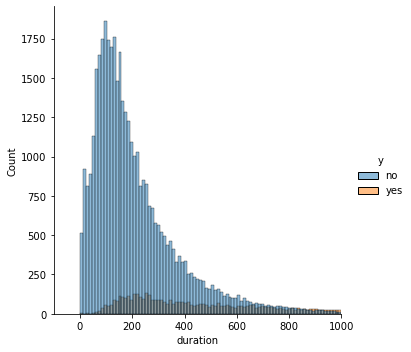

In [206]:
plt.figure(figsize = (12,6))
sns.displot(x = df['duration'],hue = df['y'])
plt.xlim(-100,1000)

Since duration is not normally distributed median will be taken for imputation

In [207]:
print('Average duration for Opting the policy', df[df['y'] == 'yes']['duration'].median())
print('Average duration for not Opting the policy', df[df['y'] == 'no']['duration'].median())

Average duration for Opting the policy 374.0
Average duration for not Opting the policy 162.0


In [208]:
median_y = df[df['y'] == 'yes']['duration'].median()
median_n = df[df['y'] == 'no']['duration'].median()

In [209]:
df['duration'] = np.where(((df['duration'] > 500) & (df['y'] == 'yes')) , median_y, df['duration'])
df['duration'] = np.where(((df['duration'] > 500) & (df['y'] == 'no')) , median_n, df['duration'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

C:\Users\RUNA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:title={'center':'DURATION'}, xlabel='duration'>

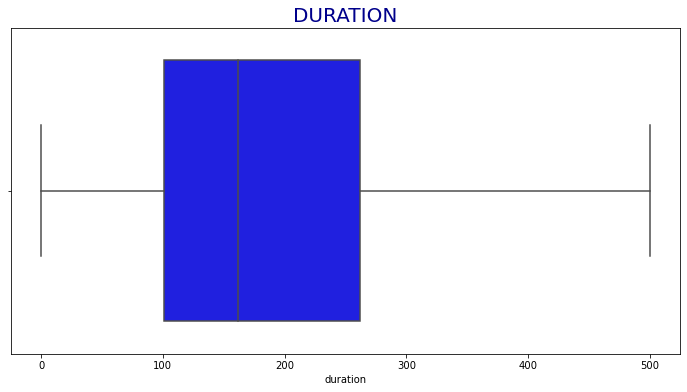

In [210]:
plt.figure(figsize = (12,6))
plt.title('DURATION',fontsize = 20,color = 'darkblue')
sns.boxplot(df['duration'],color = 'blue')

### Number of Duplicates

In [211]:
df[df.duplicated()]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y


There are no duplicates in the data.

In [212]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

## Log Transformation

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

(array([1.7197e+04, 1.2191e+04, 5.3560e+03, 5.1440e+03, 1.9810e+03,
        1.4570e+03, 5.0100e+02, 2.2800e+02, 8.7000e+01, 1.0000e+01]),
 array([0.        , 0.41431347, 0.82862695, 1.24294042, 1.65725389,
        2.07156736, 2.48588084, 2.90019431, 3.31450778, 3.72882125,
        4.14313473]),
 <BarContainer object of 10 artists>)

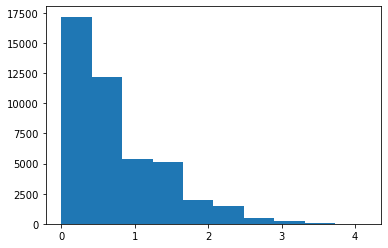

In [213]:
df['campaign'] = np.log(df['campaign'])

plt.hist(df['campaign'])

### Final Dataset

In [214]:
df.to_csv('OutliersManaged.csv')